# Data Scientist Salary Prediction 2023

# 1. Understanding Data


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
# importing data
data = pd.read_csv("F:\ds_salaries.csv")

In [3]:
# Having a glance at the dataset
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [4]:
# Checking the rows and columns in dataset
data.shape

(3755, 11)

In [5]:
#The dataset contians 11 columns and 3755 rows

In [6]:
# Looking at datatype, non-vnull value, 
## Meta data on columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


Data Science Job Salaries Dataset contains 11 columns, each are:

1. **work_year**: The year the salary was paid.
2. **experience_level**: The experience level in the job during the year
3. **employment_type**: The type of employment for the role
4. **job_title**: The role worked in during the year.
5. **salary**: The total gross salary amount paid.
6. **salary_currency**: The currency of the salary paid as an ISO 4217 currency code.
7. **salaryinusd** : The salary in USD
8. **employee_residence**: Employee's primary country of residence in during the work year as an ISO 3166 country code.
9. **remote_ratio**: The overall amount of work done remotely
10. **company_location** : The country of the employer's main office or contracting branch
11. **company_size** : The median number of people that worked for the company during the year

In [7]:
# Looking at the 5 point summary of Numeric dataset
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
work_year,3755.0,2022.373635,0.691448,2020.0,2022.0,2022.0,2023.0,2023.0
salary,3755.0,190695.571771,671676.500508,6000.0,100000.0,138000.0,180000.0,30400000.0
salary_in_usd,3755.0,137570.389880,63055.625278,5132.0,95000.0,135000.0,175000.0,450000.0
remote_ratio,3755.0,46.271638,48.589050,0.0,0.0,0.0,100.0,100.0


# 2. Data Preprocessing and EDA

## Checking Null Values

In [8]:
data.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [9]:
# Dataset has no null values

## Checking Duplicate Values

In [10]:
data.duplicated().sum()

1171

In [11]:
# Out of the Total Observation (3755) , 1171 values are duplicated. Duplicate values generally create bias performance in train_test_spilt and modelling, so we should ideally drop this duplicates

In [12]:
data =data.drop_duplicates(keep="first")

##  Glancing Quanitles Distribution of Numerical Variables

In [13]:
quantiles=data.quantile(np.arange(0.1, 1, 0.1)).transpose()
quantiles

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
work_year,2021.0,2022.0,2022.0,2022.0,2022.0,2023.0,2023.0,2023.0,2023.0
salary,55000.0,80000.0,100000.0,117020.0,134630.0,150000.0,170000.0,197000.0,235000.0
salary_in_usd,50602.4,74078.0,95000.0,111820.0,130000.0,145000.0,164099.6,187000.0,220000.0
remote_ratio,0.0,0.0,0.0,0.0,50.0,100.0,100.0,100.0,100.0


In [14]:
data.remote_ratio.value_counts()

100    1211
0      1186
50      187
Name: remote_ratio, dtype: int64

In [15]:
data.work_year.value_counts()

2023    1156
2022    1125
2021     228
2020      75
Name: work_year, dtype: int64

In [16]:
# work_year and remote_ratio are not numeric variables
# There are only two numeric variables in data
# 1. salary
# 2. salary_in_usd

In [17]:
quantiles=data[['salary','salary_in_usd']].quantile(np.arange(0.1, 1, 0.1)).transpose()
quantiles

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
salary,55000.0,80000.0,100000.0,117020.0,134630.0,150000.0,170000.0,197000.0,235000.0
salary_in_usd,50602.4,74078.0,95000.0,111820.0,130000.0,145000.0,164099.6,187000.0,220000.0


### Looking at Box plot and Histogram for each of the two varaibles

## Salary 

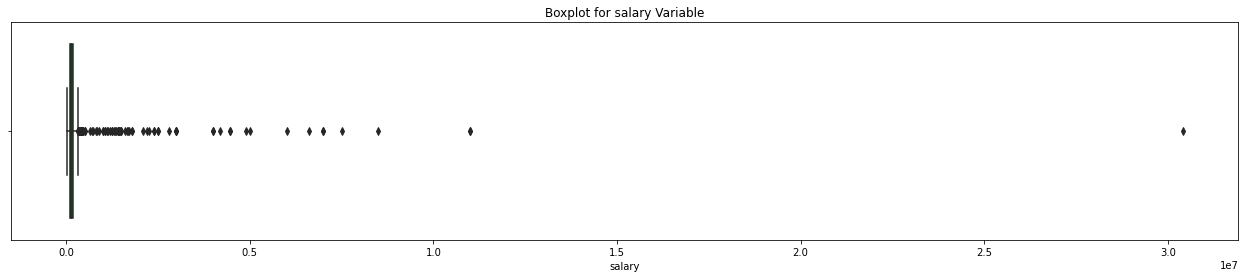

In [18]:
plt.figure(figsize=[22,4])
sns.boxplot(x = 'salary', data = data,color='green')
plt.title('Boxplot for salary Variable')
plt.show()

We see that the salary variable consist of many outliers , but this outliers are not actual outliers becuase the salary varibale is salaries in differnt currencies which is standardized in our next variables 'salary_in_usd'. So we need not treat any outlier. And keeping this variables as it is and not useful for modelling becuase it wont be able to explain much in salary variation. Instead we will be using the currency in which salary is given.

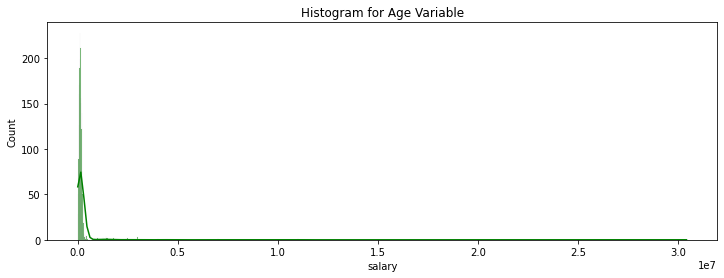

In [19]:
plt.figure(figsize=[12,4])
sns.histplot(data = data['salary'], kde = True,color='green')
plt.title('Histogram for Age Variable')
plt.show()

## salary_in_usd
### This is our Target Variable:

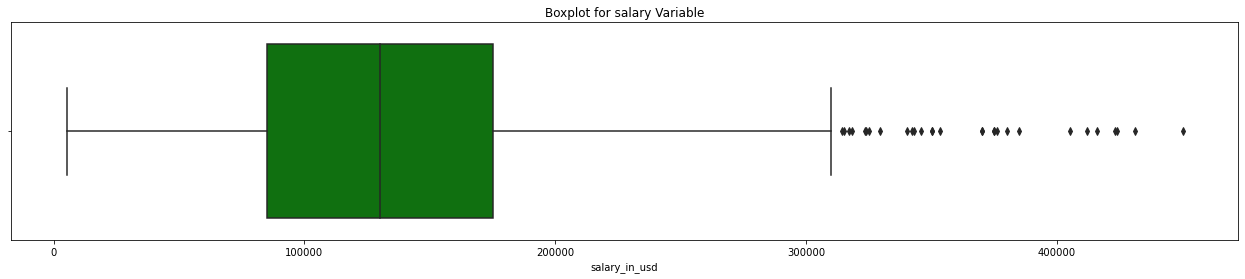

In [20]:
plt.figure(figsize=[22,4])
sns.boxplot(x = 'salary_in_usd', data = data,color='green')
plt.title('Boxplot for salary Variable')
plt.show()

In [21]:
# We observe that there are some outliers in our 'salary_in_usd' variable. But these are actual variantion in the salary. There might be people with such salary. Hence we wont treat our outliers 

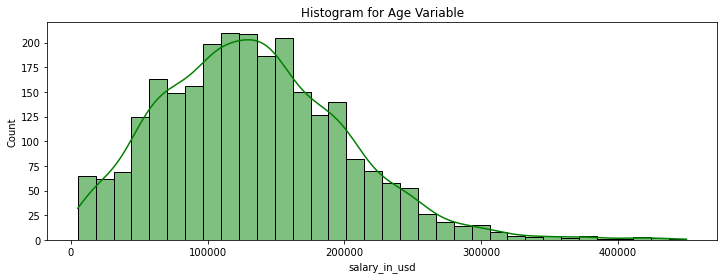

In [22]:
plt.figure(figsize=[12,4])
sns.histplot(data = data['salary_in_usd'], kde = True,color='green')
plt.title('Histogram for Age Variable')
plt.show()

### We see that salary_in_usd  is right skewed
### Mean > Median> Mode
### 75 percentile of data scientist recieve salary lesser than 175000 USD and 25 percentile recieve greater than 175000 USD

In [23]:
data['salary_in_usd'].describe()

count      2584.000000
mean     133409.280186
std       67136.837329
min        5132.000000
25%       84975.000000
50%      130000.000000
75%      175000.000000
max      450000.000000
Name: salary_in_usd, dtype: float64

In [24]:
print("Mean of salary_in_usd :",data.salary_in_usd.mean(),
     "\nMedian of salary_in_usd :",data.salary_in_usd.median(),
     "\nMode of salary_in_usd :",data.salary_in_usd.mode())

Mean of salary_in_usd : 133409.28018575851 
Median of salary_in_usd : 130000.0 
Mode of salary_in_usd : 0    100000
dtype: int64


# Frequency Distribution of Categorical Varibale

In [25]:
data[['work_year', 'experience_level', 'employment_type', 'job_title',
        'salary_currency', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size']].nunique()

work_year              4
experience_level       4
employment_type        4
job_title             93
salary_currency       20
employee_residence    78
remote_ratio           3
company_location      72
company_size           3
dtype: int64

# work_year

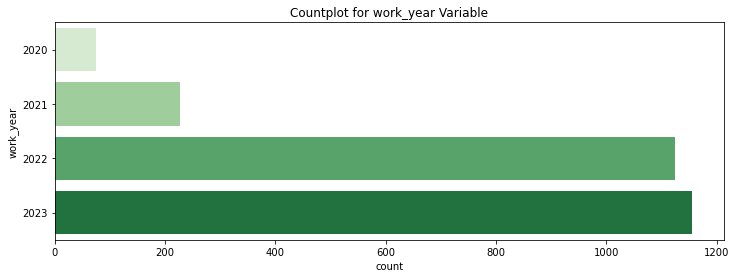

In [26]:
plt.figure(figsize=[12,4])
sns.countplot(y = data['work_year'],palette='Greens')
plt.title('Countplot for work_year Variable')
plt.show()

# experience_level

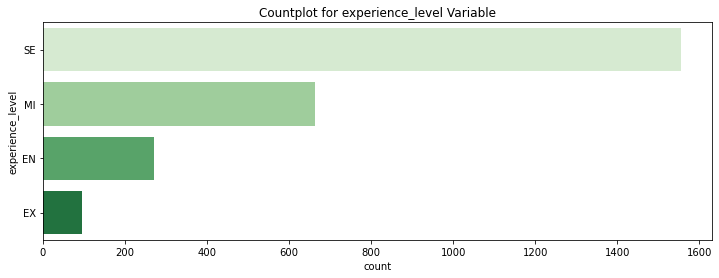

In [27]:
plt.figure(figsize=[12,4])
sns.countplot(y = data['experience_level'],palette='Greens')
plt.title('Countplot for experience_level Variable')
plt.show()

1. The are more number of senior employees  : SE
2. The second highest is Mid level experince : MI
3. The third is ENtry level : EN
4. The least are experts : EX


# employment_type

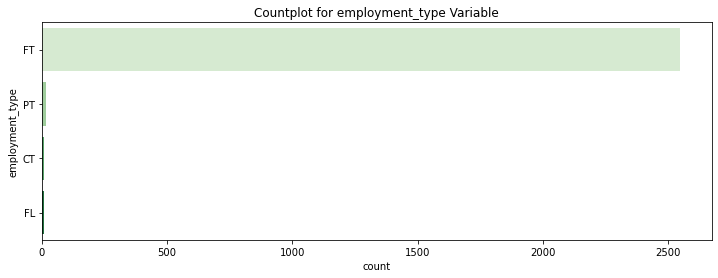

In [28]:
plt.figure(figsize=[12,4])
sns.countplot(y = data['employment_type'],order = data['employment_type'].value_counts().index,palette='Greens')
plt.title('Countplot for employment_type Variable')
plt.show()

### We can observe that there more number of Full time Employees compared to other types of employement

# job_title

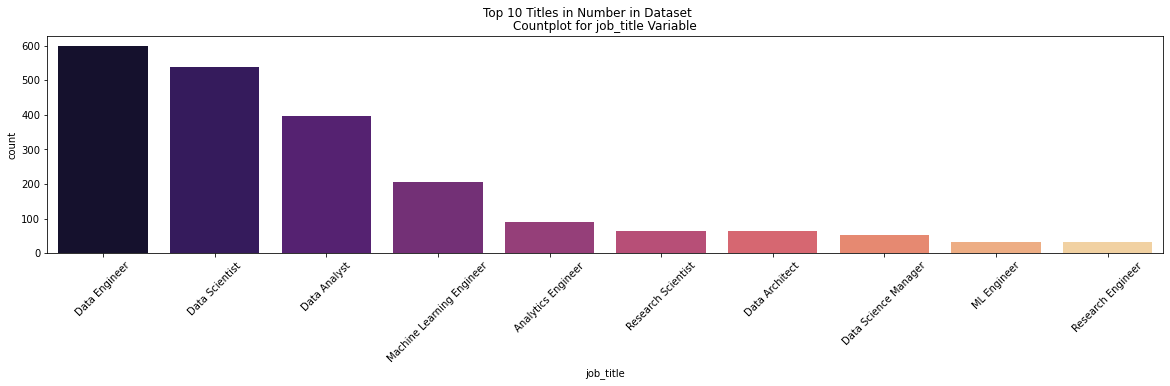

In [29]:
plt.figure(figsize=[20,4])
sns.countplot(x = data['job_title'],order=data['job_title'].value_counts().iloc[:10].index,palette='magma')
plt.title('Countplot for job_title Variable')
plt.xticks(rotation = 45)
plt.suptitle("Top 10 Titles in Number in Dataset")
plt.show()


### There are more number of Data Engineers in our Dataset compared to Data Scientist, Data Analyst, and other job_titled employees

# salary_currency

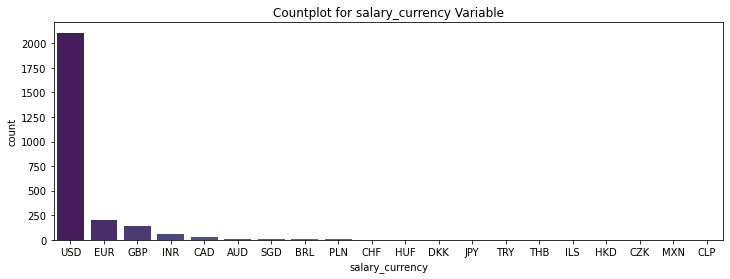

In [30]:
plt.figure(figsize=[12,4])
sns.countplot(x = data['salary_currency'],order=data['salary_currency'].value_counts().index,palette='viridis')
plt.title('Countplot for salary_currency Variable')
plt.show()


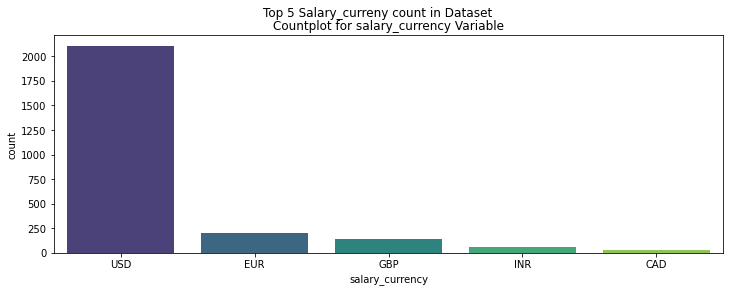

In [31]:
plt.figure(figsize=[12,4])
sns.countplot(x = data['salary_currency'],order=data['salary_currency'].value_counts().iloc[:5].index,palette='viridis')
plt.title('Countplot for salary_currency Variable')
plt.suptitle("Top 5 Salary_curreny count in Dataset")
plt.show()

### We observe that there are more number of employees who recieve their salary is USD currency

# employee_residence

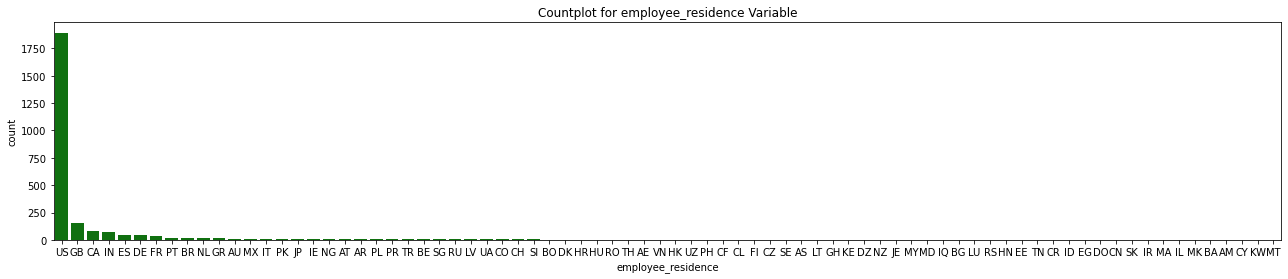

In [32]:
plt.figure(figsize=[22,4])
sns.countplot(x = data['employee_residence'],order = data['employee_residence'].value_counts().index,color='Green')
plt.title('Countplot for employee_residence Variable')
plt.show()

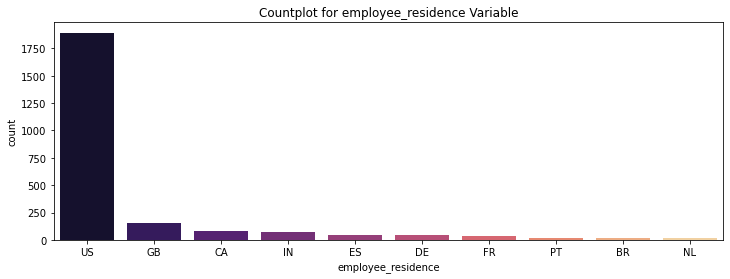

In [33]:
plt.figure(figsize=[12,4])
sns.countplot(x = data['employee_residence'],order = data['employee_residence'].value_counts().iloc[:10].index,palette='magma')
plt.title('Countplot for employee_residence Variable')
plt.show()

### We observe that there are more number of employees are US settled

 # remote_ratio

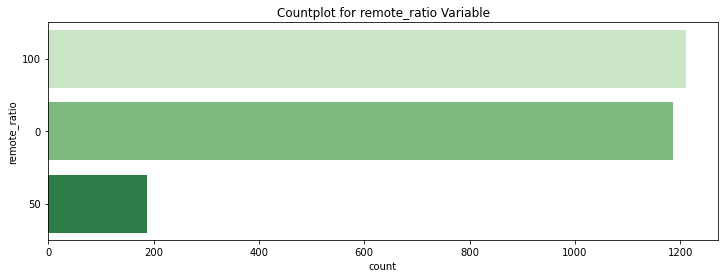

In [34]:
plt.figure(figsize=[12,4])
sns.countplot(y = data['remote_ratio'],order =  data['remote_ratio'].value_counts().index,palette='Greens')
plt.title('Countplot for remote_ratio Variable')
plt.show()

### Here we can observe that most of the Employees work (100) from office compared to those who work from home and have rotaional shift

# company_location

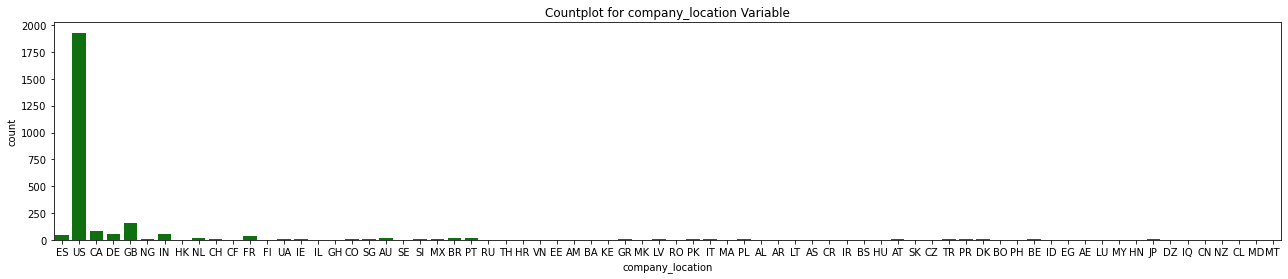

In [35]:
plt.figure(figsize=[22,4])
sns.countplot(x = data['company_location'],color='Green')
plt.title('Countplot for company_location Variable')
plt.show()

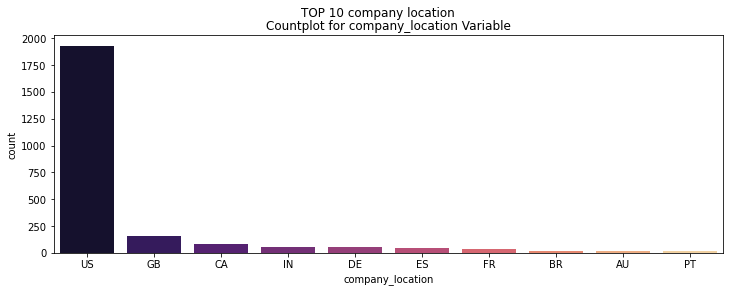

In [36]:
plt.figure(figsize=[12,4])
sns.countplot(x = data['company_location'],order = data['company_location'].value_counts().iloc[:10].index,palette='magma')
plt.title('Countplot for company_location Variable')
plt.suptitle("TOP 10 company location")
plt.show()

### As observed earlier most of the employees residence is US, they recieve slary in USD, no brainer all this employees worm in US- located company

# company_size

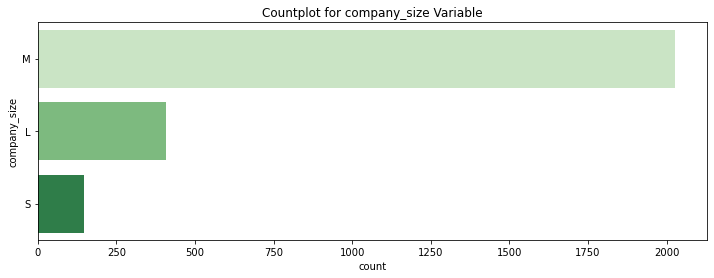

In [37]:
plt.figure(figsize=[12,4])
sns.countplot(y = data['company_size'],order=data['company_size'].value_counts().index,palette='Greens')
plt.title('Countplot for company_size Variable')
plt.show()

## Most of the Comapanies are Medium Scaled comapred to Large and small scale**

# Bivariate Analysis

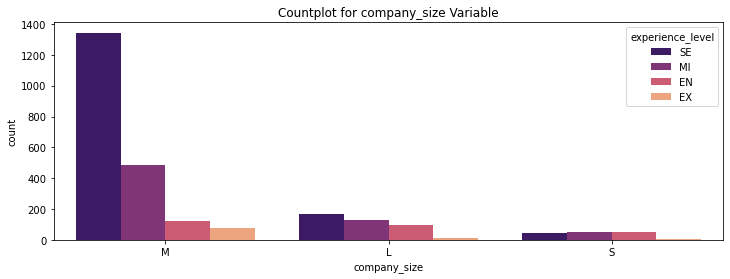

In [38]:
plt.figure(figsize=[12,4])
sns.countplot(x = data['company_size'],hue=data['experience_level'],order=data['company_size'].value_counts().index,palette='magma')
plt.title('Countplot for company_size Variable')
plt.show()

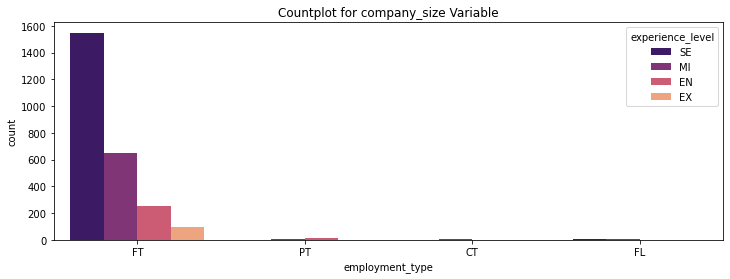

In [39]:
plt.figure(figsize=[12,4])
sns.countplot(x = data['employment_type'],hue=data['experience_level'],order=data['employment_type'].value_counts().index,palette='magma')
plt.title('Countplot for company_size Variable')
plt.show()

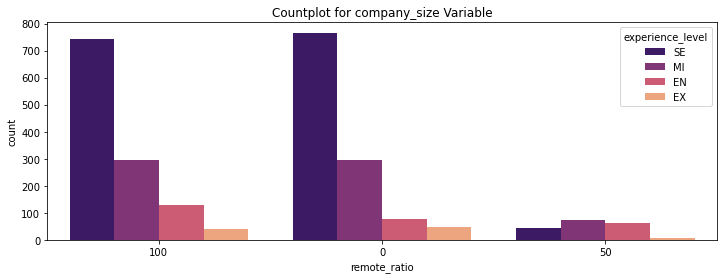

In [40]:
plt.figure(figsize=[12,4])
sns.countplot(x = data['remote_ratio'],hue=data['experience_level'],order=data['remote_ratio'].value_counts().index,palette='magma')
plt.title('Countplot for company_size Variable')
plt.show()

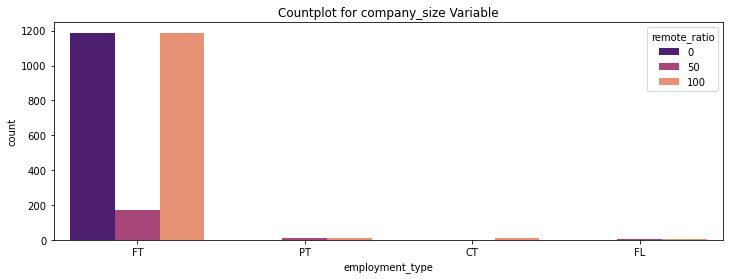

In [41]:
plt.figure(figsize=[12,4])
sns.countplot(x = data['employment_type'],hue=data['remote_ratio'],order=data['employment_type'].value_counts().index,palette='magma')
plt.title('Countplot for company_size Variable')
plt.show()

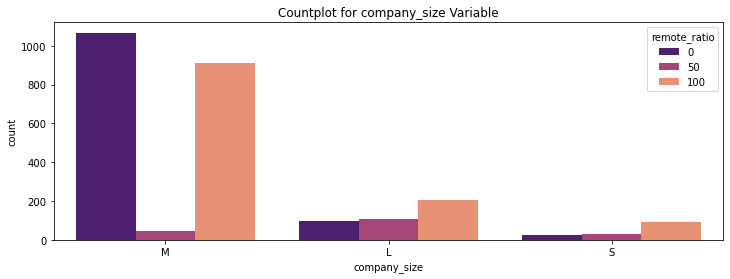

In [42]:
plt.figure(figsize=[12,4])
sns.countplot(x = data['company_size'],hue=data['remote_ratio'],order=data['company_size'].value_counts().index,palette='magma')
plt.title('Countplot for company_size Variable')
plt.show()

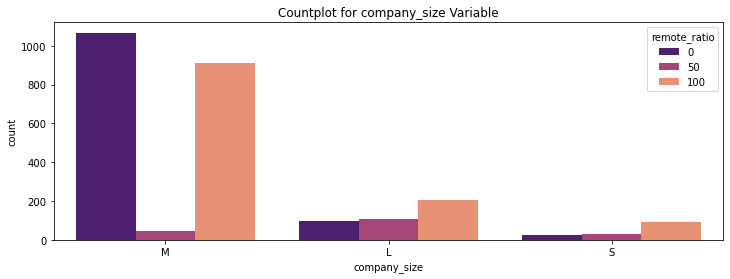

In [43]:
plt.figure(figsize=[12,4])
sns.countplot(x = data['company_size'],hue=data['remote_ratio'],order=data['company_size'].value_counts().index,palette='magma')
plt.title('Countplot for company_size Variable')
plt.show()

## Create Dummy Variables for Categorical Variabe

In [44]:
dumm=['experience_level','employment_type','company_size']
data[dumm].astype(str)

,experience_level,employment_type,company_size
0,SE,FT,L
1,MI,CT,S
2,MI,CT,S
3,SE,FT,M
4,SE,FT,M
...,...,...,...
3750,SE,FT,L
3751,MI,FT,L
3752,EN,FT,S
3753,EN,CT,L


In [45]:
data =pd.get_dummies(data,columns=['experience_level'],prefix= 'experience_level',drop_first=True)
data =pd.get_dummies(data,columns=['employment_type'],prefix= 'employment_type',drop_first=True)
data =pd.get_dummies(data,columns=['company_size'],prefix= 'company_size',drop_first=True)

# work_year

In [46]:
data['work_year'].value_counts()

2023    1156
2022    1125
2021     228
2020      75
Name: work_year, dtype: int64

In [47]:
data =pd.get_dummies(data,columns=['work_year'],prefix= 'work_year_',drop_first=True)


In [48]:
data.head()

,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_FL,employment_type_FT,employment_type_PT,company_size_M,company_size_S,work_year__2021,work_year__2022,work_year__2023
0,Principal Data Scientist,80000,EUR,85847,ES,100,ES,0,0,1,0,1,0,0,0,0,0,1
1,ML Engineer,30000,USD,30000,US,100,US,0,1,0,0,0,0,0,1,0,0,1
2,ML Engineer,25500,USD,25500,US,100,US,0,1,0,0,0,0,0,1,0,0,1
3,Data Scientist,175000,USD,175000,CA,100,CA,0,0,1,0,1,0,1,0,0,0,1
4,Data Scientist,120000,USD,120000,CA,100,CA,0,0,1,0,1,0,1,0,0,0,1


# Handling categorical varaibles with lots of categories

In [49]:
# The variables with lots of categories in it ['company_location','employee_residence','salary_currency','job_title']

# company_location

In [50]:
data['company_location'].value_counts()

US    1929
GB     155
CA      83
IN      57
DE      55
      ... 
MK       1
BS       1
IR       1
CR       1
MT       1
Name: company_location, Length: 72, dtype: int64

In [51]:
data['company_location'] = np.where(data['company_location']=="US",1,0)

In [52]:
data.rename(columns={'company_location':'company_location_US'},inplace=True)

# employee_residence

In [53]:
data['employee_residence'].value_counts()

US    1893
GB     150
CA      81
IN      70
ES      47
      ... 
BA       1
AM       1
CY       1
KW       1
MT       1
Name: employee_residence, Length: 78, dtype: int64

In [54]:
data['employee_residence'] = np.where(data['employee_residence']=="US",1,0)

In [55]:
data.rename(columns={'employee_residence':'employee_residence_US'},inplace=True)

# salary_currency

In [56]:
data['salary_currency'].value_counts()

USD    2107
EUR     200
GBP     144
INR      59
CAD      25
AUD       9
SGD       6
BRL       6
PLN       5
CHF       4
HUF       3
DKK       3
JPY       3
TRY       3
THB       2
ILS       1
HKD       1
CZK       1
MXN       1
CLP       1
Name: salary_currency, dtype: int64

In [57]:
data['salary_currency'] = np.where(data['salary_currency']=="USD",1,0)

In [58]:
data.rename(columns={'salary_currency':'salary_currency_USD'},inplace=True)

# job_title

In [59]:
data['job_title'].value_counts()

Data Engineer                598
Data Scientist               538
Data Analyst                 396
Machine Learning Engineer    206
Analytics Engineer            91
                            ... 
Compliance Data Analyst        1
Deep Learning Researcher       1
Staff Data Analyst             1
Data DevOps Engineer           1
Finance Data Analyst           1
Name: job_title, Length: 93, dtype: int64

In [60]:
data['job_title'] = np.where(data['job_title']=="Data Engineer",data['job_title'],
                            np.where(data['job_title']=="Data Scientist",data['job_title'],
                              np.where(data['job_title']=="Data Analyst",data['job_title'],
                                      np.where(data['job_title']=="Machine Learning Engineer",data['job_title'],"Other"))))

In [61]:
data['job_title'].value_counts()

Other                        846
Data Engineer                598
Data Scientist               538
Data Analyst                 396
Machine Learning Engineer    206
Name: job_title, dtype: int64

In [62]:
data =pd.get_dummies(data,columns=['job_title'],prefix= 'company_size',drop_first=True)

In [63]:
# Renamed variables
['company_location_US','employee_residence_US','salary_currency_USD']

['company_location_US', 'employee_residence_US', 'salary_currency_USD']

In [64]:
data.head()

,salary,salary_currency_USD,salary_in_usd,employee_residence_US,remote_ratio,company_location_US,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_FL,...,employment_type_PT,company_size_M,company_size_S,work_year__2021,work_year__2022,work_year__2023,company_size_Data Engineer,company_size_Data Scientist,company_size_Machine Learning Engineer,company_size_Other
0,80000,0,85847,0,100,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
1,30000,1,30000,1,100,1,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1
2,25500,1,25500,1,100,1,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1
3,175000,1,175000,0,100,0,0,0,1,0,...,0,1,0,0,0,1,0,1,0,0
4,120000,1,120000,0,100,0,0,0,1,0,...,0,1,0,0,0,1,0,1,0,0


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2584 entries, 0 to 3754
Data columns (total 21 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   salary                                  2584 non-null   int64
 1   salary_currency_USD                     2584 non-null   int32
 2   salary_in_usd                           2584 non-null   int64
 3   employee_residence_US                   2584 non-null   int32
 4   remote_ratio                            2584 non-null   int64
 5   company_location_US                     2584 non-null   int32
 6   experience_level_EX                     2584 non-null   uint8
 7   experience_level_MI                     2584 non-null   uint8
 8   experience_level_SE                     2584 non-null   uint8
 9   employment_type_FL                      2584 non-null   uint8
 10  employment_type_FT                      2584 non-null   uint8
 11  employment_type_P

In [66]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
salary,2584.0,210365.296440,808037.535609,6000.0,90000.0,134630.0,182562.5,30400000.0
salary_currency_USD,2584.0,0.815402,0.388046,0.0,1.0,1.0,1.0,1.0
salary_in_usd,2584.0,133409.280186,67136.837329,5132.0,84975.0,130000.0,175000.0,450000.0
employee_residence_US,2584.0,0.732585,0.442696,0.0,0.0,1.0,1.0,1.0
remote_ratio,2584.0,50.483746,48.163707,0.0,0.0,50.0,100.0,100.0
company_location_US,2584.0,0.746517,0.435089,0.0,0.0,1.0,1.0,1.0
experience_level_EX,2584.0,0.037152,0.189170,0.0,0.0,0.0,0.0,1.0
experience_level_MI,2584.0,0.256966,0.437045,0.0,0.0,0.0,1.0,1.0
experience_level_SE,2584.0,0.601393,0.489706,0.0,0.0,1.0,1.0,1.0
employment_type_FL,2584.0,0.003870,0.062101,0.0,0.0,0.0,0.0,1.0


In [67]:
data.shape

(2584, 21)

In [68]:
data.nunique()

salary                                     815
salary_currency_USD                          2
salary_in_usd                             1035
employee_residence_US                        2
remote_ratio                                 3
company_location_US                          2
experience_level_EX                          2
experience_level_MI                          2
experience_level_SE                          2
employment_type_FL                           2
employment_type_FT                           2
employment_type_PT                           2
company_size_M                               2
company_size_S                               2
work_year__2021                              2
work_year__2022                              2
work_year__2023                              2
company_size_Data Engineer                   2
company_size_Data Scientist                  2
company_size_Machine Learning Engineer       2
company_size_Other                           2
dtype: int64

# Dropping Salary Variable 
- we dont need it becuase we have salary which is standardized in US currency

In [69]:
data.drop(columns=['salary'],inplace=True, axis=1)

# 3. Modelling

### First cut model

# Creating X, y Data set

In [70]:
data.columns

Index(['salary_currency_USD', 'salary_in_usd', 'employee_residence_US',
       'remote_ratio', 'company_location_US', 'experience_level_EX',
       'experience_level_MI', 'experience_level_SE', 'employment_type_FL',
       'employment_type_FT', 'employment_type_PT', 'company_size_M',
       'company_size_S', 'work_year__2021', 'work_year__2022',
       'work_year__2023', 'company_size_Data Engineer',
       'company_size_Data Scientist', 'company_size_Machine Learning Engineer',
       'company_size_Other'],
      dtype='object')

In [71]:
X=data[['salary_currency_USD', 'employee_residence_US',
       'remote_ratio', 'company_location_US', 'experience_level_EX',
       'experience_level_MI', 'experience_level_SE', 'employment_type_FL',
       'employment_type_FT', 'employment_type_PT', 'company_size_M',
       'company_size_S', 'company_size_Data Engineer',
       'company_size_Data Scientist', 'company_size_Machine Learning Engineer',
       'company_size_Other', 'work_year__2021', 'work_year__2022',
       'work_year__2023']]
y=data['salary_in_usd']

# Splitting into train_test_split

In [72]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=42)

In [73]:
print('X_train.shape : ',X_train.shape,'\nX_test.shape  : ',X_test.shape,'\ny_train.shape : ',y_train.shape,'\ny_test.shape  : ',y_test.shape )

X_train.shape :  (1808, 19) 
X_test.shape  :  (776, 19) 
y_train.shape :  (1808,) 
y_test.shape  :  (776,)


# Linear Regeression

In [74]:
from sklearn.linear_model import LinearRegression

In [75]:
LR = LinearRegression()

In [76]:
LR.fit(X_train,y_train)

LinearRegression()

In [77]:
LR.score(X_train,y_train)

0.4252055889923124

In [78]:
LR.score(X_test, y_test)

0.39087566809586693

In [79]:
y_pred = LR.predict(X_test)

In [80]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data.sort_values(by='VIF',ascending=False))

                                   feature        VIF
3                      company_location_US  49.944235
1                    employee_residence_US  48.142856
8                       employment_type_FT  44.880736
18                         work_year__2023  17.324186
0                      salary_currency_USD  16.305314
17                         work_year__2022  16.175317
10                          company_size_M   7.913637
6                      experience_level_SE   7.895316
16                         work_year__2021   3.741925
5                      experience_level_MI   3.646663
15                      company_size_Other   3.193870
12              company_size_Data Engineer   2.532494
13             company_size_Data Scientist   2.357943
2                             remote_ratio   2.237897
14  company_size_Machine Learning Engineer   1.537241
4                      experience_level_EX   1.434977
11                          company_size_S   1.397395
9                       empl

###  Feature Selection

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [82]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [83]:
sel.get_support()

array([False, False,  True, False, False,  True,  True, False, False,
       False,  True,  True,  True,  True, False,  True, False,  True,
       False])

In [84]:
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)
selected_feat

Index(['remote_ratio', 'experience_level_MI', 'experience_level_SE',
       'company_size_M', 'company_size_S', 'company_size_Data Engineer',
       'company_size_Data Scientist', 'company_size_Other', 'work_year__2022'],
      dtype='object')

# New model using features given by Random Forest

In [85]:
X=data[['remote_ratio', 'experience_level_MI', 'experience_level_SE',
       'company_size_M', 'company_size_S', 'company_size_Data Engineer',
       'company_size_Data Scientist', 'company_size_Other', 'work_year__2022']]
y=data['salary_in_usd']

In [86]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=42)

In [87]:
print('X_train.shape : ',X_train.shape,'\nX_test.shape  : ',X_test.shape,'\ny_train.shape : ',y_train.shape,'\ny_test.shape  : ',y_test.shape )

X_train.shape :  (1808, 9) 
X_test.shape  :  (776, 9) 
y_train.shape :  (1808,) 
y_test.shape  :  (776,)


In [88]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

In [89]:
LR.fit(X_train,y_train)

LinearRegression()

In [90]:
LR.score(X_train,y_train)

0.18766631535147316

In [91]:
LR.score(X_test, y_test)

0.18759585655855227

###  Multicolinearity Check

In [92]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data.sort_values(by='VIF',ascending=False))

                       feature       VIF
3               company_size_M  4.711069
2          experience_level_SE  4.286401
1          experience_level_MI  2.158602
0                 remote_ratio  2.018442
7           company_size_Other  1.939376
8              work_year__2022  1.782726
5   company_size_Data Engineer  1.761181
6  company_size_Data Scientist  1.649842
4               company_size_S  1.212210


# 4. Conclusion
- The accuracy is low 
- X and y might not be linear in parameter
- There might be problem of Heteroscadasticity we have to check on it